# Reproducible Data Dependencies
## JupyterCon 2018

# Jackson Brown
## Allen Institute for Cell Science

@jacksonmaxfield (GitHub)


# Aneesh Karve
## Quilt Data

@akarve


# Tech partnership
* Distribute terabytes of open images
* Leverage data versioning for reproduciblity

# What scientists are used to

![bad data versioning](https://img.techwallacdn.com/300x250/cpie/images/a04/pi/hr/login-ftp-server-1.2-800x800.jpg)

# What we're moving towards

# `quilt.install("aics/random_sample")`

![quilt catalog](https://s3.amazonaws.com/quilt-web-public/jcon/catalog.png)




# You have scientists that want to share everything that comes to their computer.
# They don't know how to do that.
# _That's your job_.

# What scientists say:
# Where the f@#* are my files?
# And did anyone mess with them?

# If people can't get to Allen Cell's data, we're not doing open science


![high res, detailed](https://s3.amazonaws.com/quilt-web-public/jcon/microt.gif)

<img src="https://s3.amazonaws.com/quilt-web-public/jcon/lots_of_cells.png" width="600" />

# reproducible notebook = `f(code, data)`
* pure function
* depends _only_ on parameters

# code has gotten most of the attention

* `pip install quilt==2.9.9`
* `git checkout 424ef3`
* `docker run -i 8dbd9e392a96`

# "It’s so bad it sometimes feels like stepping back in time to when we coded without source control."
## - Pete Warden, Staff Research Engineer, Google

# Can we manage data like code?
* Versions
* Packages
* Namespaces

# What is meant by _data_?
* **Anything** that is not code
* JSON, Parquet, JPEG, models, etc
* Bytes

# Data package lifecycle

<img src="https://s3.amazonaws.com/quilt-web-public/jcon/quilt-lifecycle.png" width="300" />

# Four use cases

1. Have data, must share
2. Have data, must slice
3. Have data, must deserialize
4. Have model, must _rehydrate_

# Have data, must share

In [ ]:
import quilt
import numpy as np

In [7]:
d1 = np.random.rand(100, 100)

quilt.build("akarve/foo/d1", d1)

quilt.push("akarve/foo")

Fetching upload URLs from the registry...


  0%|          | 0.00/80.1k [00:00<?, ?B/s]

Uploading 1 fragments (80128 bytes)...


100%|██████████| 80.1k/80.1k [00:00<00:00, 89.1kB/s]


Uploading package metadata...
Updating the 'latest' tag...
Push complete. akarve/foo is live:
https://quiltdata.com/package/akarve/foo


[https://quiltdata.com/package/aics/random_sample](https://quiltdata.com/package/aics/random_sample)

# Have data, must slice

In [3]:
quilt.install("aics/random_sample/cell_segs")

  0%|          | 0.00/5.90M [00:00<?, ?B/s]

100%|██████████| 5.90M/5.90M [00:00<00:00, 8.30MB/s]


In [4]:
from quilt.data.aics import random_sample
random_sample.cell_segs

<GroupNode>
cell_plate_3500000680_well_E8_100X_20170307_E08_P05czi_cellW/
cell_plate_3500000684_well_E7_100X_20170307_E07_P36czi_cellW/
cell_plate_3500000765_well_D4_100X_20170328_2_Scene_04_P11_D0/
cell_plate_3500000922_well_F7_100X_20170522_2_Scene_21_P41_F0/
cell_plate_3500000943_well_E4_100X_20170530_2_Scene_4_P8_E04/
cell_plate_3500000953_well_E5_100X_20170607_5e_Scene_1_P37_E0/
cell_plate_3500000956_well_E5_100X_20170606_2e_Scene_2_P11_E0/
cell_plate_3500000961_well_F8_100X_20170609_2_Scene_28_P49_F0/
cell_plate_3500000982_well_E4_100X_20170620_1_Scene_03_P3_E04/
cell_plate_3500000987_well_F4_100X_20170619_5_Scene_3_P27_F04/
cell_plate_3500000987_well_F5_100X_20170619_5_Scene_6_P30_F05/
cell_plate_3500001003_well_F8_100X_20170623_2_Scene_17_P42_F0/
cell_plate_3500001086_well_E5_100X_20170719_17_65_2c_Scene_06/
cell_plate_3500001108_well_E7_100X_20170724_1c_Scene_05_P5_E0/
cell_plate_3500001123_well_F6_100X_20170725_4_Scene_06_P26_F0/
cell_plate_3500001175_well_E4_100X_20170811_1e

# Publications: inlcude hash of data used to generate the results

## `quilt.install("your_lab/your_paper", hash="cd410f14")`

# Slice Google Open Images (9M, 18TB)
![alt text](https://s3.amazonaws.com/quilt-web-public/jcon/jinyang.png)

In [ ]:
import helium as quilt3


## Create training set

In [0]:
hotdog = """
select * from "frags_openimages_trainable-human-bbox"
where contains(split(alldescriptionsforimageid, ',') , 'Hot dog');
"""

In [0]:
quilt3.query("frags/open-images/trainable-human-bbox", hotdog)

## Create test set

In [0]:
nothotdog = """
select * from "frags_openimages_trainable-human-bbox"
where not contains(split(alldescriptionsforimageid, ',') , 'Hot dog')
order by rand()
limit 141;
"""

he.query("frags/open-images/trainable-human-bbox", nothotdog)

# Have data, must deserialize

In [11]:
quilt.install("akarve/BSDS300")

akarve/BSDS300 already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [ ]:
from quilt.data.akarve import BSDS300 as bsd
from quilt.asa.img import plot

bsd.images.test(asa=plot(figsize=(20, 20)))

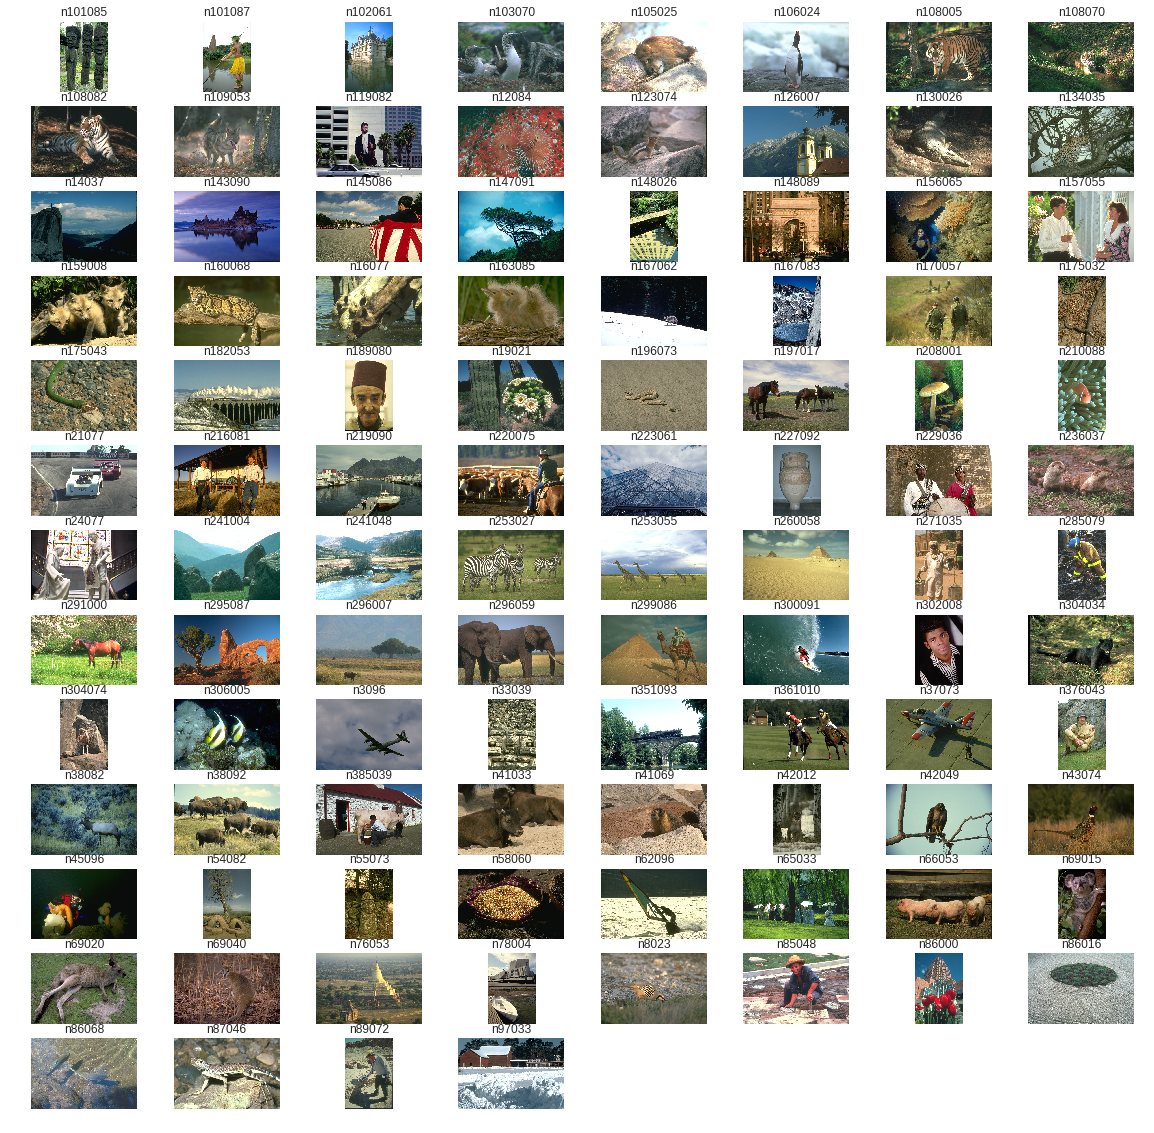

In [0]:
from quilt.data.akarve import BSDS300 as bsd
from quilt.asa.pytorch import dataset

my_dataset = pkg.mixed.img(asa=dataset(
    include=is_image,
    node_parser=node_parser,
    input_transform=input_transform(crop_size, upscale_factor),
    target_transform=target_transform(crop_size)
))

# Share your deserializers
* People struggle with mystery data formats
* Make your custom format accessible
* Data may be too large for standard loaders


# Have model, must rehydrate

## Sharing trained models, saves billions of CPU cycles

![label free prediction](https://s3.amazonaws.com/quilt-web-public/jcon/label_free.png)

In [8]:
quilt.install("aics/label_free")
from quilt.data.aics import label_free

aics/label_free already installed.
Overwrite? (y/n) y
Fragments already downloaded


In [9]:
label_free

<GroupNode>
dna/
fibrillarin/
lamin_b1/
membrane/
sec61_beta/
tom20/
README

```python
import fnet
dna_serialized = label_free.dna.model()
dna_model = fnet.fnet_model.Model(dna_serialized)

# handle your input image here

prediction = dna_model.predict(input_image)
```

# Wrap Up

# Open science should expose the entire pipeline

![aics pipeline](https://s3.amazonaws.com/quilt-web-public/jcon/institute_pipeline.png)

## Quilt covers four bases

| | Internal | External |
|---|------|-----|
| Prototype data | ✓ | ✓ |
| Production data | ✓ | ✓ |

### In development
* One-off dataset publishing (Internal & External Prototype)
* Nightly builds for rapid updates (Internal & External Production)


# Recommendations
* Version your data + models
* Build pipelines from versioned building blocks


# Design guidelines
* **immutable** package instances
* **distributed** blob storage layer
* **de-duplicate** repeated fragments via *hash tree*


# Architecture
* Compiler - build package
    * Python, pyarrow
* Registry - index, permission packages
    * Python, flask
* Catalog - search, browse packages
    * JavaScript, React
    
 

 ## [https://github.com/quiltdata/quilt](https://github.com/quiltdata/quilt)

# Quilt 3
* A better interface to S3
* Slice with SQL
* Vega-lite for visualization
* Search and version individual Python objects

# Questions?
* aneesh@quiltdata.io
* jacksonb@alleninstitute.org